In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import f1_score

In [4]:
heart_disease = pd.read_csv('C:/Users/dowre/GIT/Mini project Heart disease/Heart-Disease/heart.csv')

In [5]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Target variable: whether the patient has a heart disease or not
    • Value 0: yes
    • Value 1: no
sex
(1 = male; 0 = female) 
cp
Chest pain type
    • Value 0: asymptomatic
    • Value 1: atypical angina
    • Value 2: pain without relation to angina
    • Value 3: typical angina

trestbps
Resting blood pressure in millimeters of mercury (mm Hg)  when the patient was admitted to the hospital. 

chol
Cholesterol level in mg/dl

fbs
Fasting blood sugar  Whether the level of sugar in the blood is higher than 120 mg/dl or not.  
Value 0: no
Value 1: yes

restecg
Results of the electrocardiogram on rest
    • Value 0: probable left ventricular hypertrophy
    • Value 1: normal
    • Value 2: abnormalities in the T wave or ST segment

thalach
Maxium heart rate during the stress test 
during exercise
exang
Whether the patient had angina during exercise
    • Valor 0: no
    • Valor 1: yes
oldpeak
Decrease of the ST segment during exercise according to the same one on rest.
The ST segment is a part of the electrocardiogram of a heart beat that is usually found at a certain level in a normal heart beat. A significant displacement of this segment can indicate the presence of a heart disease as we can see in the plot. 

slope
Slope of the ST segment during the most demanding part of the exercise
    • Value 0: descending
    • Value 1: flat
    • Value 2: ascending

thal
Results of the blood flow observed via the radioactive dye.
    • Value 0: NULL (dropped from the dataset previously)
    • Value 1: fixed defect (no blood flow in some part of the heart)
    • Value 2: normal blood flow
    • Value 3: reversible defect (a blood flow is observed but it is not normal)

ca
Number of main blood vessels coloured by the radioactive dye. The number varies between 0 to 4 but the value 4 represents a null value and these have been dropped previously.
This feature refers to the number of narrow blood vessels seen, this is why the higher the value of this feature, the more likely it is to have a heart disease. 

# Do Explore data Analysis

In [6]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#check missing value
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


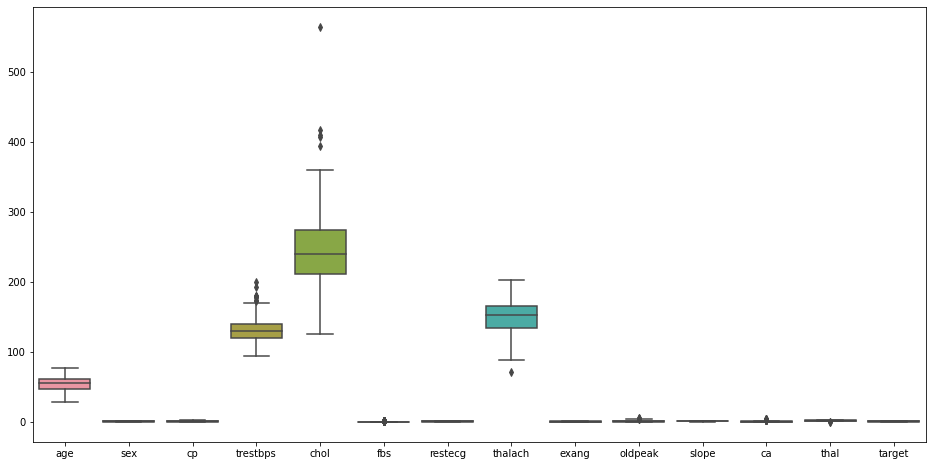

In [9]:
#Identify outlier
plt.subplots(figsize=(16,8))
sns.boxplot(data = heart_disease)

In [10]:
print(heart_disease['chol'].quantile(0.10))
print(heart_disease['chol'].quantile(0.99))

188.0
406.74000000000024


In [11]:
heart_disease.max()

age          77.0
sex           1.0
cp            3.0
trestbps    200.0
chol        564.0
fbs           1.0
restecg       2.0
thalach     202.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            4.0
thal          3.0
target        1.0
dtype: float64

In [12]:
#handle outlier  for Chol column, consider only the above 500 is outlier
heart_disease['chol'] = np.where(heart_disease['chol']> 417 ,417, heart_disease['chol'])

In [13]:
heart_disease.max()

age          77.0
sex           1.0
cp            3.0
trestbps    200.0
chol        417.0
fbs           1.0
restecg       2.0
thalach     202.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            4.0
thal          3.0
target        1.0
dtype: float64

In [14]:
# From original data set , the following rows has ca value equal to  4 which are incorrect so I drop them.

drop_row_ca4 =  heart_disease.loc[heart_disease['ca'] == 4]

In [15]:
drop_row_ca4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [16]:
heart_disease.drop([92,158,163,164,251])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [17]:
# From original data set , the following rows has thal value equal to 0 which are incorrect so I drop them.

drop_row_thal0 =  heart_disease.loc[heart_disease['thal'] == 0]

In [18]:
drop_row_thal0

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [19]:
heart_disease.drop([48,281])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [20]:
#find the relationship between each feature
heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.210139,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.192887,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.090402,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.138346,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.210139,-0.192887,-0.090402,0.138346,1.000000,0.018026,-0.148333,-0.014858,0.077046,0.051765,0.002145,0.080875,0.092465,-0.098267
fbs,0.121308,0.045032,0.094444,0.177531,0.018026,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.148333,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.014858,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.077046,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.051765,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


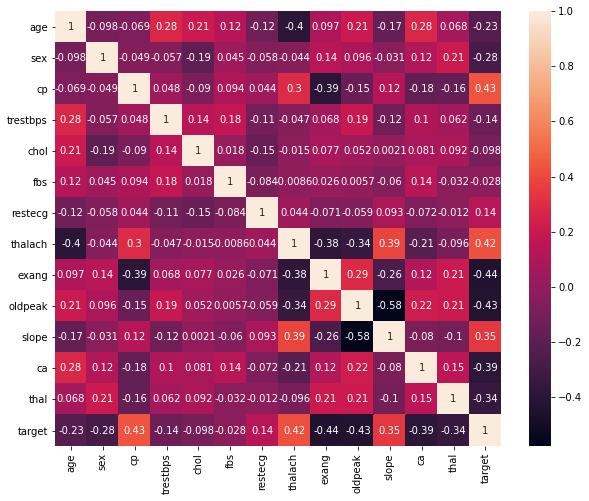

In [21]:
#find the relationship between each feature in heatmap
plt.figure(figsize=(10,8))
correlation = heart_disease.corr()
sns.heatmap(correlation, annot = True)

C:\Users\dowre\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\dowre\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\dowre\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\dowre\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\dowre\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


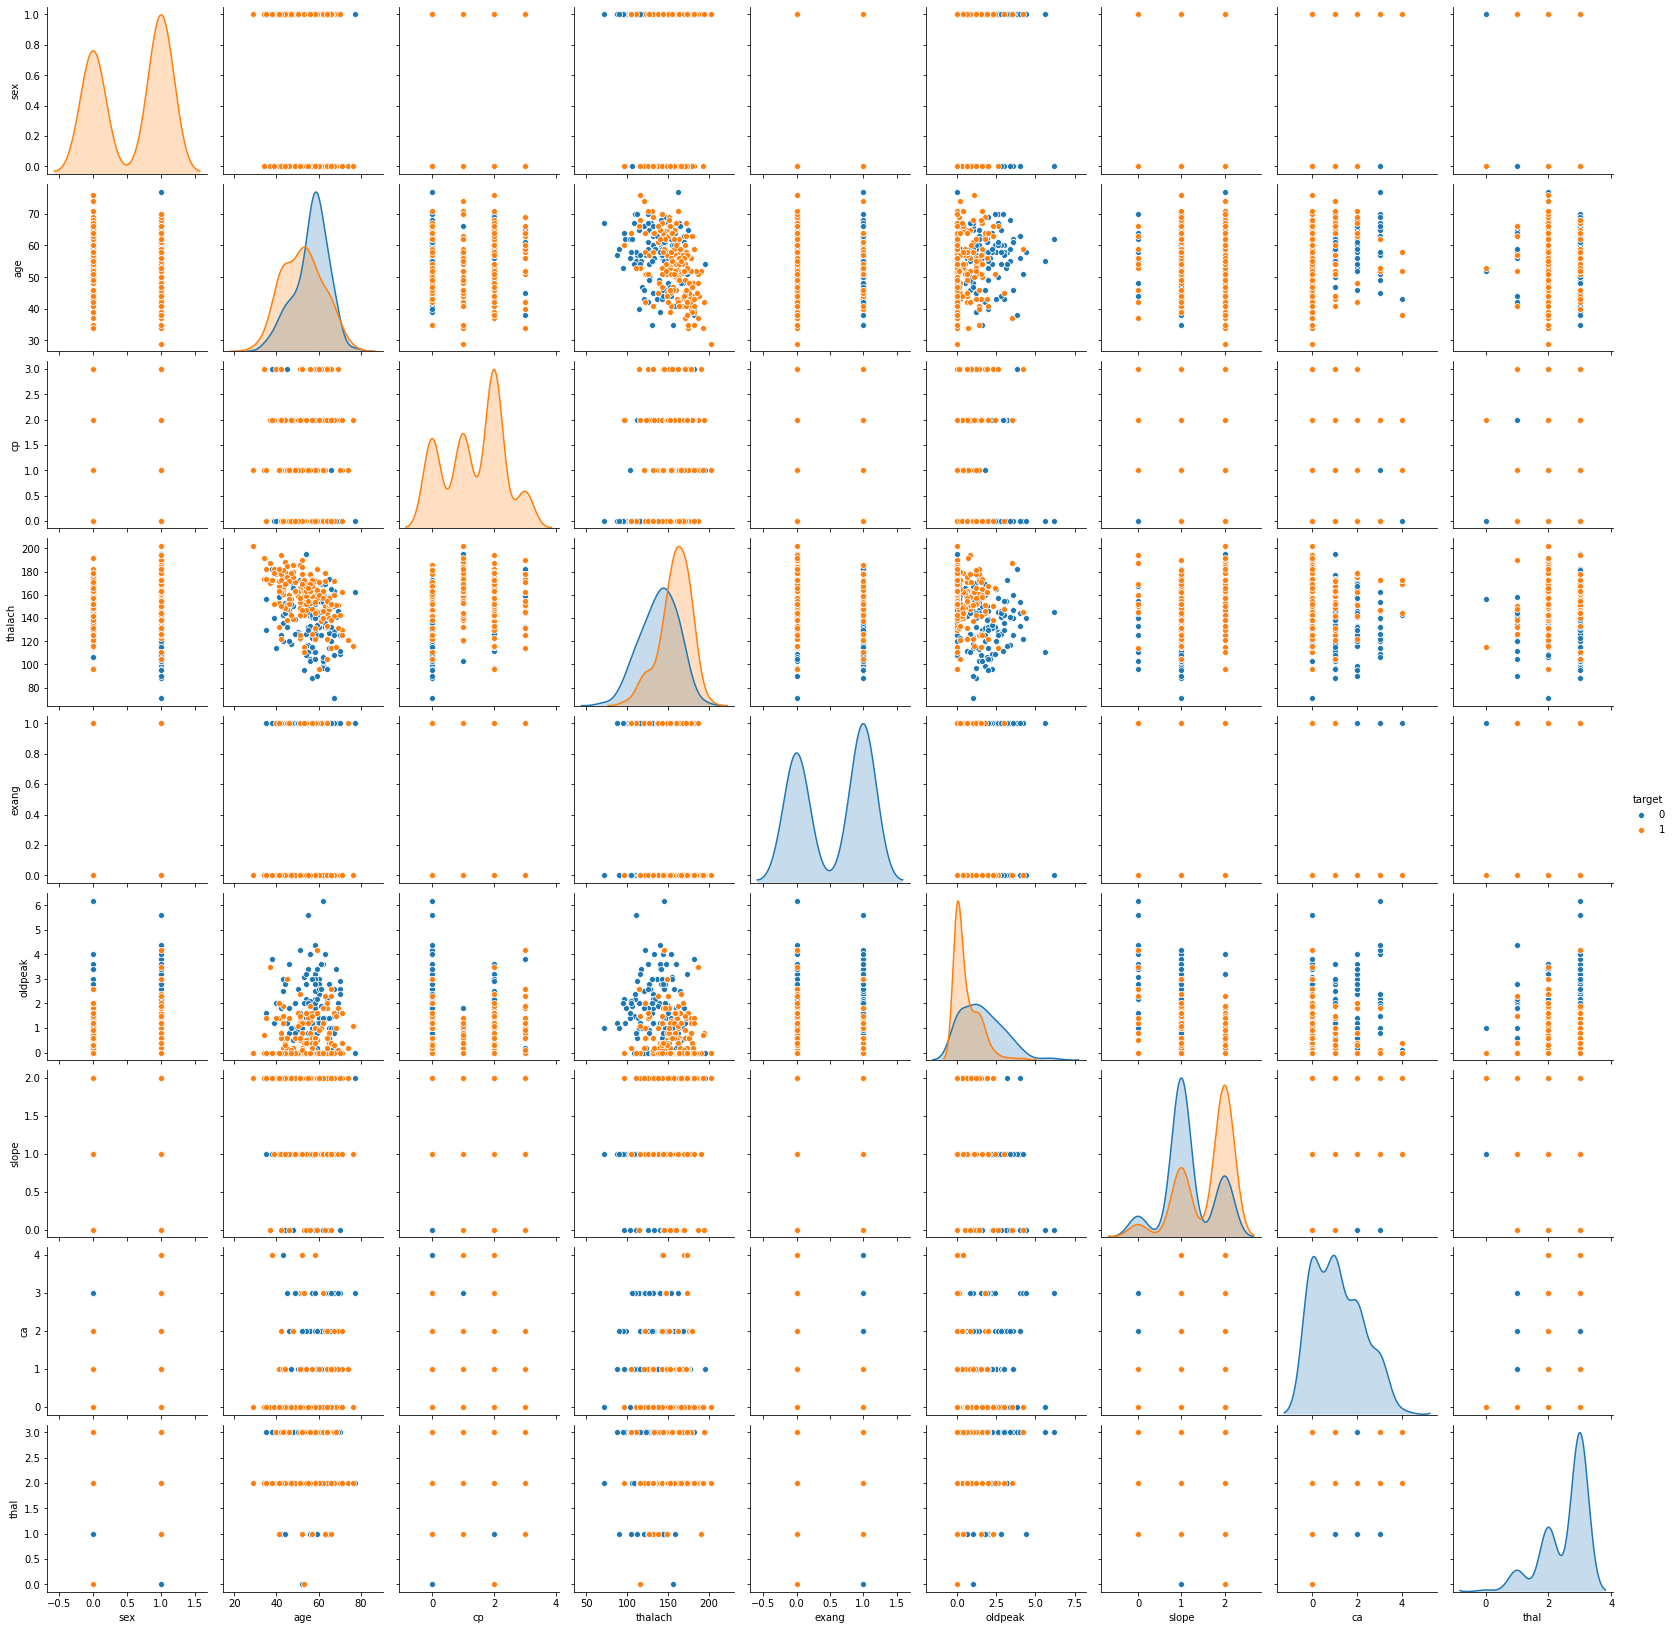

In [22]:
# see the relationship between the feture that has high association value
sns.pairplot(heart_disease, hue= 'target', vars=['sex','age','cp','thalach','exang','oldpeak','slope','ca','thal'])
plt.show()

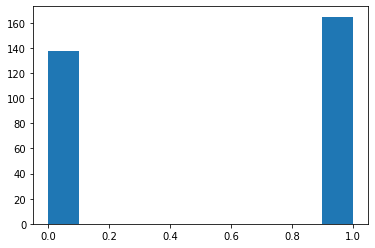

In [23]:
#check data distribution
plt.hist(heart_disease['target']);

# Modeling and Prediction

In [24]:
X = heart_disease.drop(columns = ['target'])

In [25]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [26]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [27]:
#Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
X_train.shape

(203, 13)

In [29]:
X_test.shape

(100, 13)

## Try logistic regression model 

In [30]:
#fit data set to logistic regression model 
my_model_logisticregression = LogisticRegression(random_state=0)
my_model_logisticregression.fit(X_train,y_train)

C:\Users\dowre\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_pred = my_model_logisticregression.predict(X_test)

In [32]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [33]:
#check model score of Logistic regression on test set
my_model_logisticregression.score(X_test,y_test)

0.8

In [34]:
y_test_numpy = y_test.to_numpy()
y_test_numpy

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [35]:
f1_score(y_pred,y_test_numpy)

0.8245614035087718

## Try decision tree classifier

In [36]:
#fit data set to logistic regression model
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation 

In [37]:
my_model_decisiontree = DecisionTreeClassifier()

In [38]:
# Train Decision Tree Classifer 
my_model_decisiontree = my_model_decisiontree.fit(X_train,y_train)

In [39]:
y_pred = my_model_decisiontree.predict(X_test) 

In [40]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [41]:
# Model Accuracy, how often is the classifier correct? 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.74


In [42]:
y_test_numpy = y_test.to_numpy()
y_test_numpy

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [43]:
f1_score(y_test_numpy,y_pred)

0.7592592592592593

## Try RandomForest classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import classification_report,confusion_matrix

In [45]:
my_model_randomforest = RandomForestClassifier(n_estimators=100,random_state=0)

In [46]:
#visualize_classifier(my_model_randomforest,X,y)

In [47]:
my_model_randomforest= my_model_randomforest.fit(X_train,y_train)

In [48]:
y_pred = my_model_randomforest.predict(X_test)

In [49]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [50]:
print ("Accuracy:" ,metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.81


In [51]:
y_test_numpy = y_test.to_numpy()
y_test_numpy

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [52]:
f1_score(y_test_numpy,y_pred)

0.8347826086956522

## Try K-nearest neighbor Classifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier(n_neighbors=3)

In [55]:
#train the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [56]:
y_pred = knn.predict(X_test)

In [57]:
knn.score(X_test,y_test)

0.62

In [58]:
y_test_numpy = y_test.to_numpy()
y_test_numpy

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [59]:
f1_score(y_test_numpy,y_pred)

0.6545454545454545

## Try Logistic regression with feature selection

In [60]:
#try subset
columns = ['sex','age','cp','thalach','exang','oldpeak','slope','ca','thal']
subset = heart_disease[columns]

In [61]:
subset.head()

,sex,age,cp,thalach,exang,oldpeak,slope,ca,thal
0,1,63,3,150,0,2.3,0,0,1
1,1,37,2,187,0,3.5,0,0,2
2,0,41,1,172,0,1.4,2,0,2
3,1,56,1,178,0,0.8,2,0,2
4,0,57,0,163,1,0.6,2,0,2


In [62]:
X = subset

In [63]:
X.head()

,sex,age,cp,thalach,exang,oldpeak,slope,ca,thal
0,1,63,3,150,0,2.3,0,0,1
1,1,37,2,187,0,3.5,0,0,2
2,0,41,1,172,0,1.4,2,0,2
3,1,56,1,178,0,0.8,2,0,2
4,0,57,0,163,1,0.6,2,0,2


Use logistic regression model with subset

In [64]:
#Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [65]:
X_train.head()

,sex,age,cp,thalach,exang,oldpeak,slope,ca,thal
37,1,54,2,165,0,1.6,2,0,3
16,0,58,2,172,0,0.0,2,0,2
126,1,47,0,143,0,0.1,2,0,2
291,1,58,0,140,0,4.4,0,3,1
273,1,58,0,156,0,0.1,2,1,3


In [66]:
X_train.shape

(203, 9)

In [67]:
X_test.shape

(100, 9)

In [68]:
#train to logistic regression model with subset
my_model_subset = LogisticRegression(random_state=0)
my_model_subset.fit(X_train,y_train)

C:\Users\dowre\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
y_pred = my_model_subset.predict(X_test)

In [70]:
my_model_subset.score(X_test,y_test)

0.8

In [71]:
y_test_numpy = y_test.to_numpy()
y_test_numpy

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [72]:
f1_score(y_test_numpy,y_pred)

0.8245614035087718

## Try Logistic regression with one hot coding

In [97]:
#Still use subset feature
subset_1 = pd.get_dummies(subset,columns = ['sex','cp', 'exang', 'slope','ca','thal'] )

In [74]:
subset_1.head()

,age,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,exang_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,150,2.3,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0
1,37,187,3.5,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
2,41,172,1.4,1,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,178,0.8,0,1,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,163,0.6,1,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0


In [75]:
# Use logistic regression 
X = subset_1
X.head()

,age,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,exang_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,150,2.3,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0
1,37,187,3.5,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
2,41,172,1.4,1,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,178,0.8,0,1,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,163,0.6,1,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0


In [76]:
#Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [77]:
X_train.shape

(203, 23)

In [78]:
X_test.shape

(100, 23)

In [79]:
my_model_subset.fit(X_train,y_train)

C:\Users\dowre\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
y_pred = my_model_subset.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [81]:
my_model_subset.score(X_test,y_test)

0.87

In [82]:
y_test_numpy = y_test.to_numpy()
y_test_numpy

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [83]:
f1_score(y_test_numpy,y_pred)

0.888888888888889

## Try normalization data on selecting features

In [84]:
from sklearn import preprocessing

In [85]:
X.head()

,age,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,exang_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,150,2.3,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0
1,37,187,3.5,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
2,41,172,1.4,1,0,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,178,0.8,0,1,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,163,0.6,1,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0


In [86]:
#normalize data

#X = subset_1
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(data = X_scaled, columns=subset_1.columns)

In [87]:
X.head()

,age,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,exang_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.708333,0.603053,0.370968,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.885496,0.564516,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.770992,0.225806,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.816794,0.129032,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.702290,0.096774,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [88]:
#Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=1)

In [89]:
X_train.shape

(203, 23)

In [90]:
X_test.shape

(100, 23)

In [91]:
X_train.head()

,age,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,exang_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
91,0.583333,0.740458,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
221,0.541667,0.305344,0.903226,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
172,0.604167,0.679389,0.290323,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44,0.208333,0.847328,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
169,0.500000,0.641221,0.500000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [92]:
#train data to Logistic Regression model
my_model_subset.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
#check prediction
y_pred = my_model_subset.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [94]:
#check score 
my_model_subset.score(X_test,y_test)

0.82

In [95]:
y_test_numpy = y_test.to_numpy()
y_test_numpy

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [96]:
#check f1score 
f1_score(y_test_numpy,y_pred)

0.8333333333333334

## Conclusion

Summary results from all different modes  

- Logistic regression: .score= 0.8 , f1score = 0.82
- Decision tree classifier    : .score= 0.74 , f1score = 0.76
- Random forest classifier   : .score = 0.81 , f1score = 0.83
- K-nearest neighbor classifier  .score = 0.62 , f1score = 0.65
- Logistic regression with feature selection: .score = 0.8 , f1score = 0.82
- Logistic regression with one hot coding: .score = 0.87 , f1score = 0.89
- Normalization data on selecting features: score 0.82   f1_score 0.83

From the results above, the model that gives the most accurate prediction is 
Logistic regression model with select only some features with one hot coding. The selected features are 'sex','age','cp','thalach','exang','oldpeak','slope','ca','thal'
The one hot coding columns are 'sex','cp', 'exang', 'slope','ca','thal'